In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, 2:]
y = iris.target

In [2]:

from sklearn.tree import DecisionTreeClassifier

def plot_decision_boundary(model, axis):
  x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
  )
  X_new = np.c_[x0.ravel(), x1.ravel()]
  
  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)
  
  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
  
  plt.contourf(x0, x1, zz, cmap=custom_cmap)

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

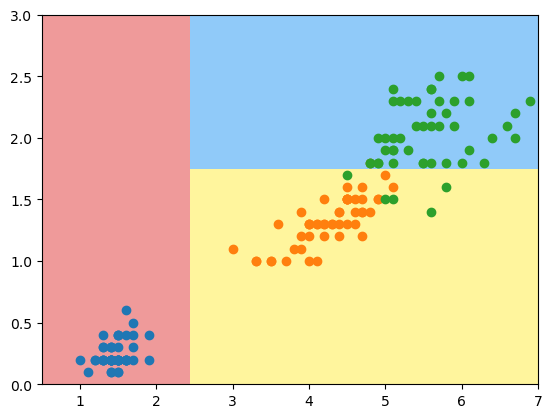

In [3]:
plot_decision_boundary(dt_clf, axis=[0.5, 7, 0,3])

plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.show()

In [4]:
### 模拟使用信息熵进行划分

In [5]:
def split(X, y, d, value):
  index_a = (X[:,d] <= value)
  index_b = (X[:,d] > value)
  return X[index_a], X[index_b], y[index_a], y[index_b]

In [6]:
from collections import Counter
from math import log
def entropy(y):
  counter = Counter(y)
  res = 0.0 
  for num in counter.values():
    p = num / len(y)
    res += -p * log(p)
  return res

def try_split(X, y):
  best_entropy = float('inf')
  best_d, best_v = -1, -1
  for d in range(X.shape[1]):
    sorted_index = np.argsort(X[:,d])
    for i in range(1, len(X)):
      if X[sorted_index[i - 1], d] != X[sorted_index[i], d]:
        v = (X[sorted_index[i - 1], d] + X[sorted_index[i], d]) / 2
        X_l, X_r, y_l, y_r = split(X, y, d, v)
        e = entropy(y_l) + entropy(y_r)
        if e < best_entropy:
          best_entropy, best_d, best_v = e, d, v

  return best_entropy, best_d, best_v

In [7]:
best_entropy, best_d, best_v = try_split(X, y)

In [10]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [11]:
entropy(y1_l)

0.0

In [12]:
entropy(y1_r)

0.6931471805599453

In [13]:
best_entropy, best_d, best_v =  try_split(X1_r, y1_r)

In [14]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d, best_v)

In [15]:
entropy(y2_l)

0.30849545083110386

In [16]:
entropy(y2_r)

0.10473243910508653